In [2]:
import sklearn.cluster
import numpy as np
from astroquery.gaia import Gaia
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt



In [12]:
t = Table.read('tst.hdf', format='hdf5')

X = np.array([t['ra'], t['dec'], t['parallax'], t['pmra'], t['pmdec'], t['ra_parallax_corr'], t['dec_parallax_corr'] ])
Xnew= np.transpose(X)


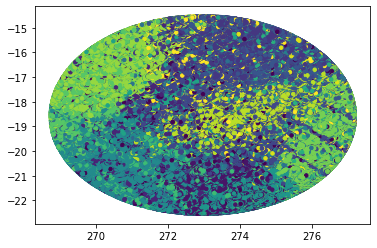

In [11]:
from sklearn.mixture import GaussianMixture
import pandas as pd
gmm = GaussianMixture(n_components=20).fit(Xnew)
labels = gmm.predict(Xnew)

df = pd.read_csv('clusters.csv')
saved_x= df.RA
saved_y= df.DEC

plt.scatter(Xnew[:, 0], Xnew[:, 1], c=labels, s=12, cmap='viridis')
plt.scatter(saved_x , saved_y, s=36, marker='^', zorder=0, color= 'red')
plt.show()


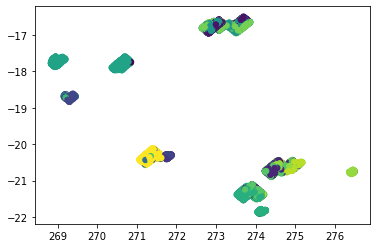

In [5]:
labels_1 = gmm.fit_predict(Xnew)
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=labels_1, s=30, cmap='viridis')


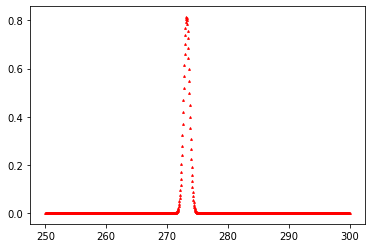

In [6]:
from scipy.stats import norm
mu = gmm.means_
sigma = gmm.covariances_
x = np.linspace(250, 300, 1000).reshape(1000,1)
y = norm.pdf(x,mu[0][0],sigma[0][0][0])
plt.scatter(x , y, s=3, marker='^', zorder=0, color= 'red')

In [7]:
import pandas as pd
df = pd.read_csv('clusters.csv')
df.head()

,Cluster,RA,DEC
0,Collinder_469,274.143,-18.309
1,Dias_5,274.385,-19.707
2,Gulliver_15,272.599,-16.723
3,Markarian_38,273.819,-18.997
4,NGC_6494,269.237,-18.987


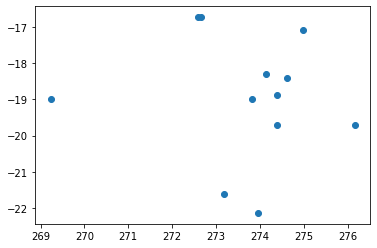

In [8]:
import pandas as pd
df = pd.read_csv('clusters.csv')
saved_x= df.RA
saved_y= df.DEC
plt.scatter(saved_x , saved_y)

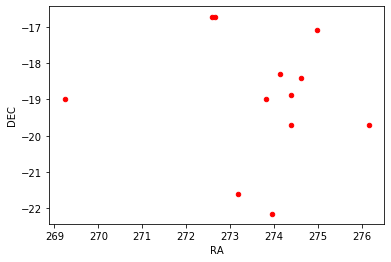

In [9]:
import pandas as pd
import plotly.express as px
df.plot(kind='scatter', x='RA', y='DEC', color='red')